In [1]:
# run this cell to import all necessary libraries for the notebook experiments
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

# imports from custom library
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd.util import flatten_func
from autograd import grad as compute_grad   # The only autograd function you may ever need

import math
import pandas as pd
import copy

# import custom files
from mlrefined_libraries import nonlinear_learning_library as nonlib
from mlrefined_libraries import superlearn_library as superlearn

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Simple quadratic

- carry over simple quadratic example, showcase - take the custom plotter from homework 2 of optimization

In [2]:
import contour_run_comparison

In [7]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten function mom
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist=[]
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm

        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))     

    return w_hist

In [8]:
# define constants for a N=2 input quadratic
a = 0
b = 0*np.ones((2,1))
C = np.array([[1,0],[0,12]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

In [142]:
w_init = np.ones((2,1))
w_init[1] = 0.5
w_init[0] = 8

# w_init = np.random.randn(2,1)
alpha = 8*10**(-2)
max_its = 13
version = 'unnormalized'

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.8
beta = 0.1
weight_history_2 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.2
weight_history_3 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.3
weight_history_4 = gradient_descent(g,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


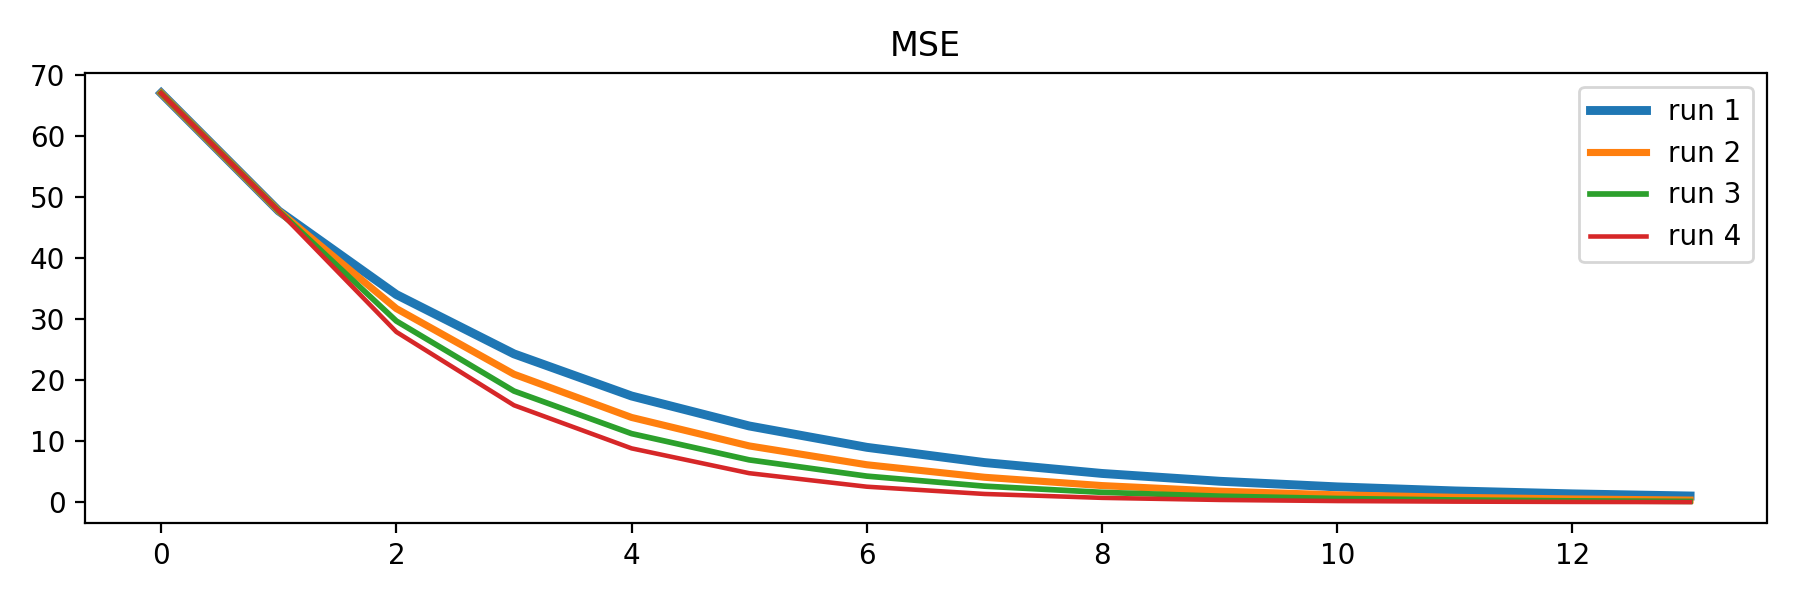

In [143]:
histories = [weight_history_1,weight_history_2,weight_history_3,weight_history_4]
compare_regression_histories(histories,g)

<IPython.core.display.Javascript object>


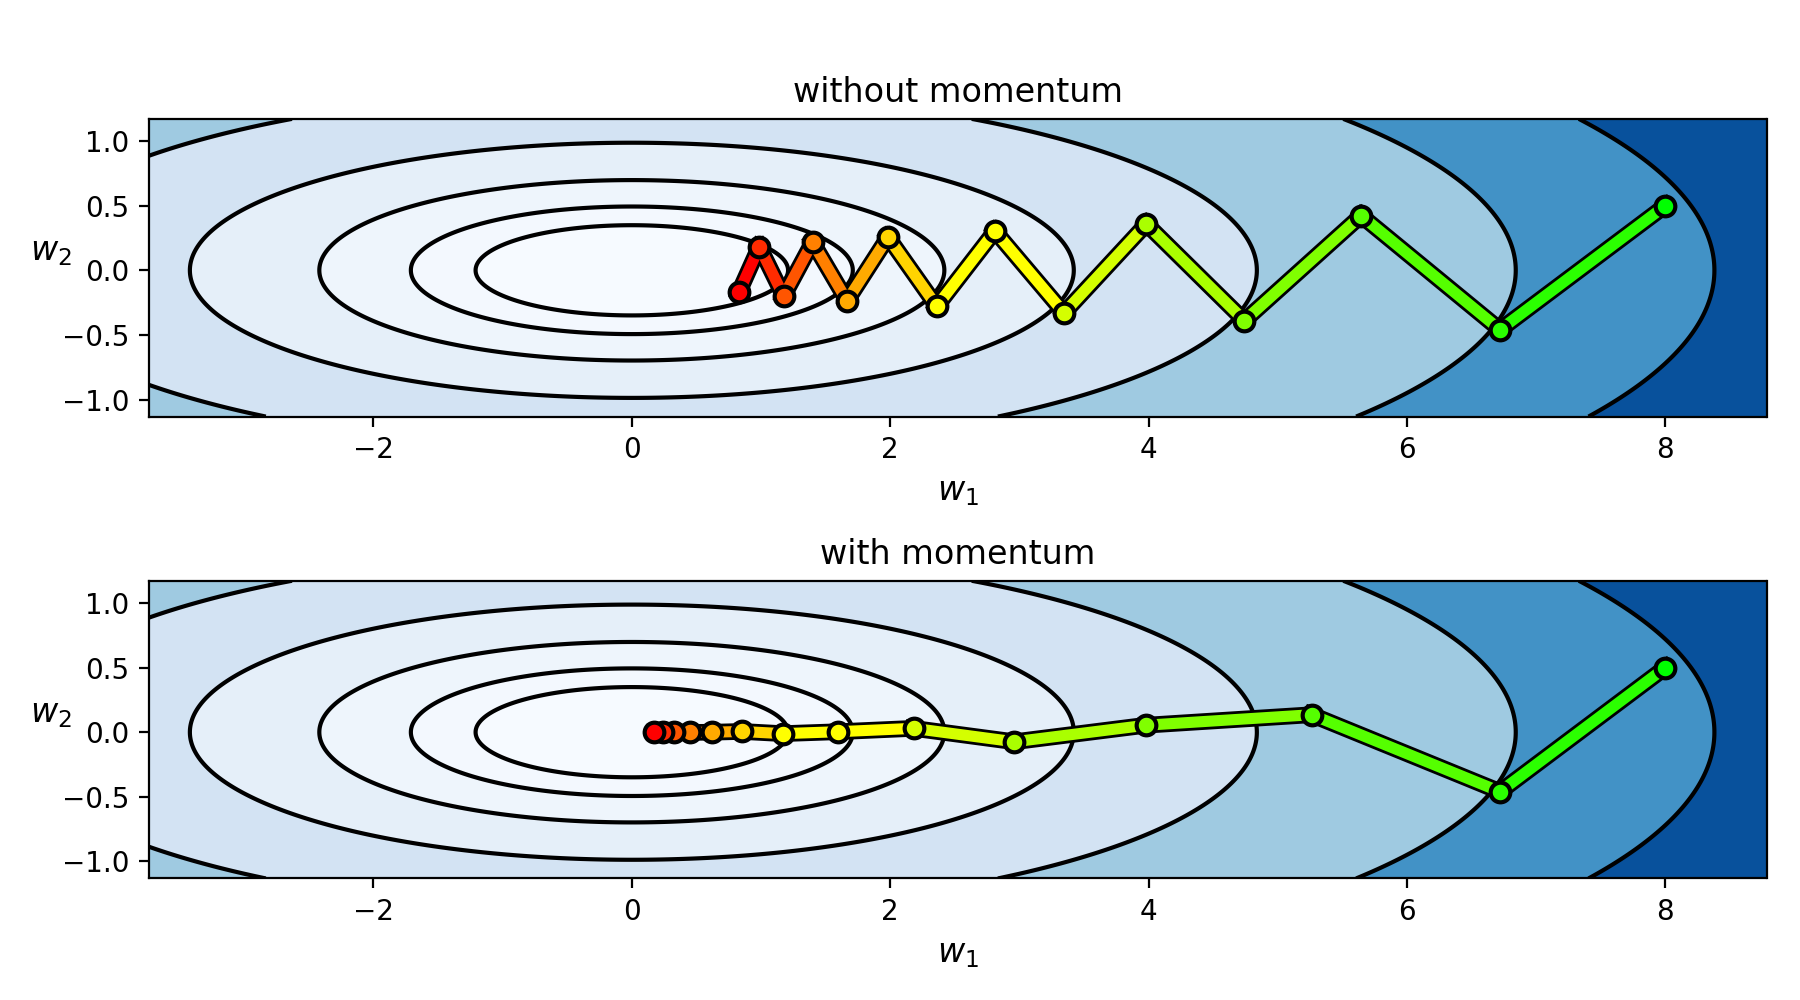

In [144]:
demo = contour_run_comparison.Visualizer()
demo.show_paths(g, weight_history_1,weight_history_4,num_contours = 20)

In [295]:
# define constants for a N=2 input quadratic
a = 0
b = 2*np.ones((2,1))
b[1] = 0
C = np.array([[0,0],[0,12]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

In [318]:
w_init = np.ones((2,1))
w_init[1] = 2
w_init[0] = 12

# w_init = np.random.randn(2,1)
alpha = 8.3*10**(-2)
max_its = 30
version = 'unnormalized'

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.8
beta = 0.7
weight_history_2 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.8
weight_history_3 = gradient_descent(g,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.85
weight_history_4 = gradient_descent(g,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


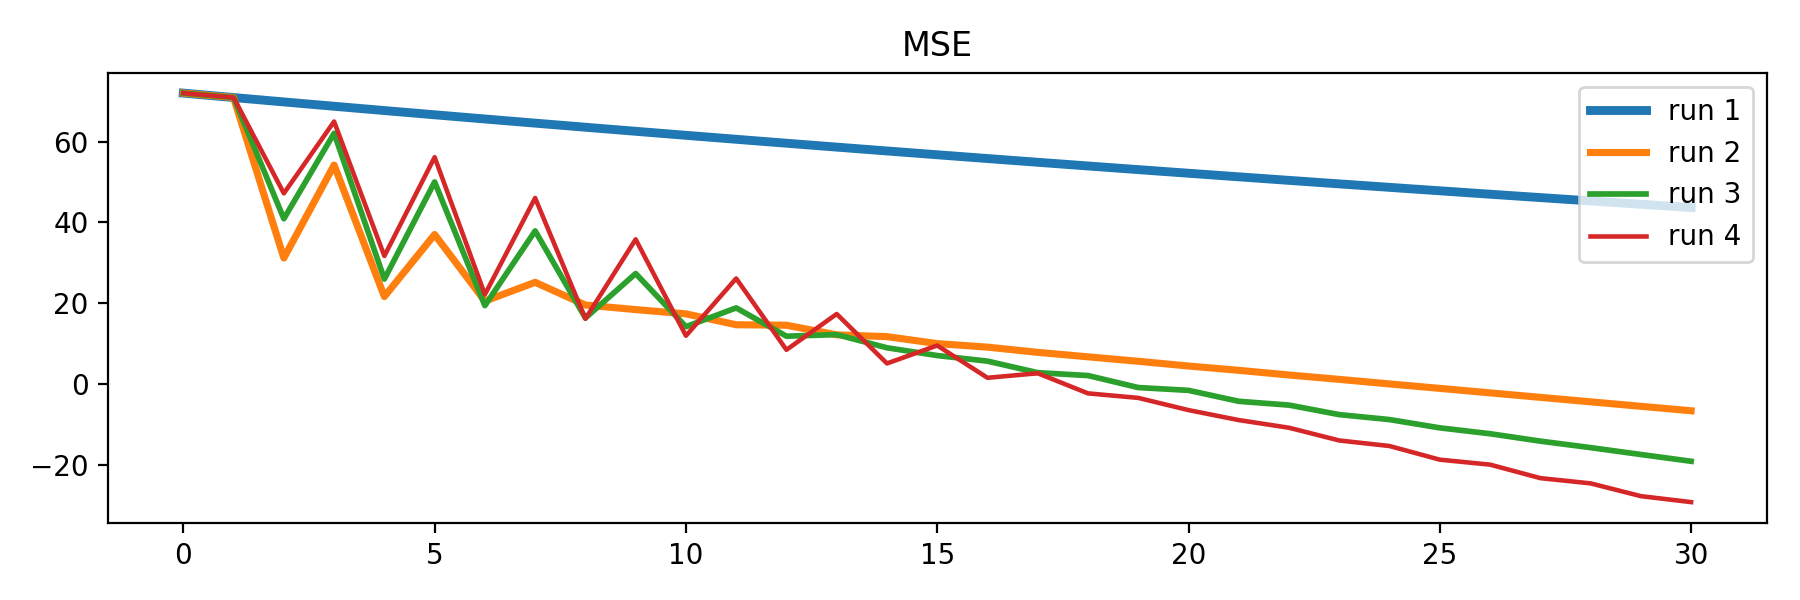

In [319]:
histories = [weight_history_1,weight_history_2,weight_history_3,weight_history_4]
compare_regression_histories(histories,g)

<IPython.core.display.Javascript object>


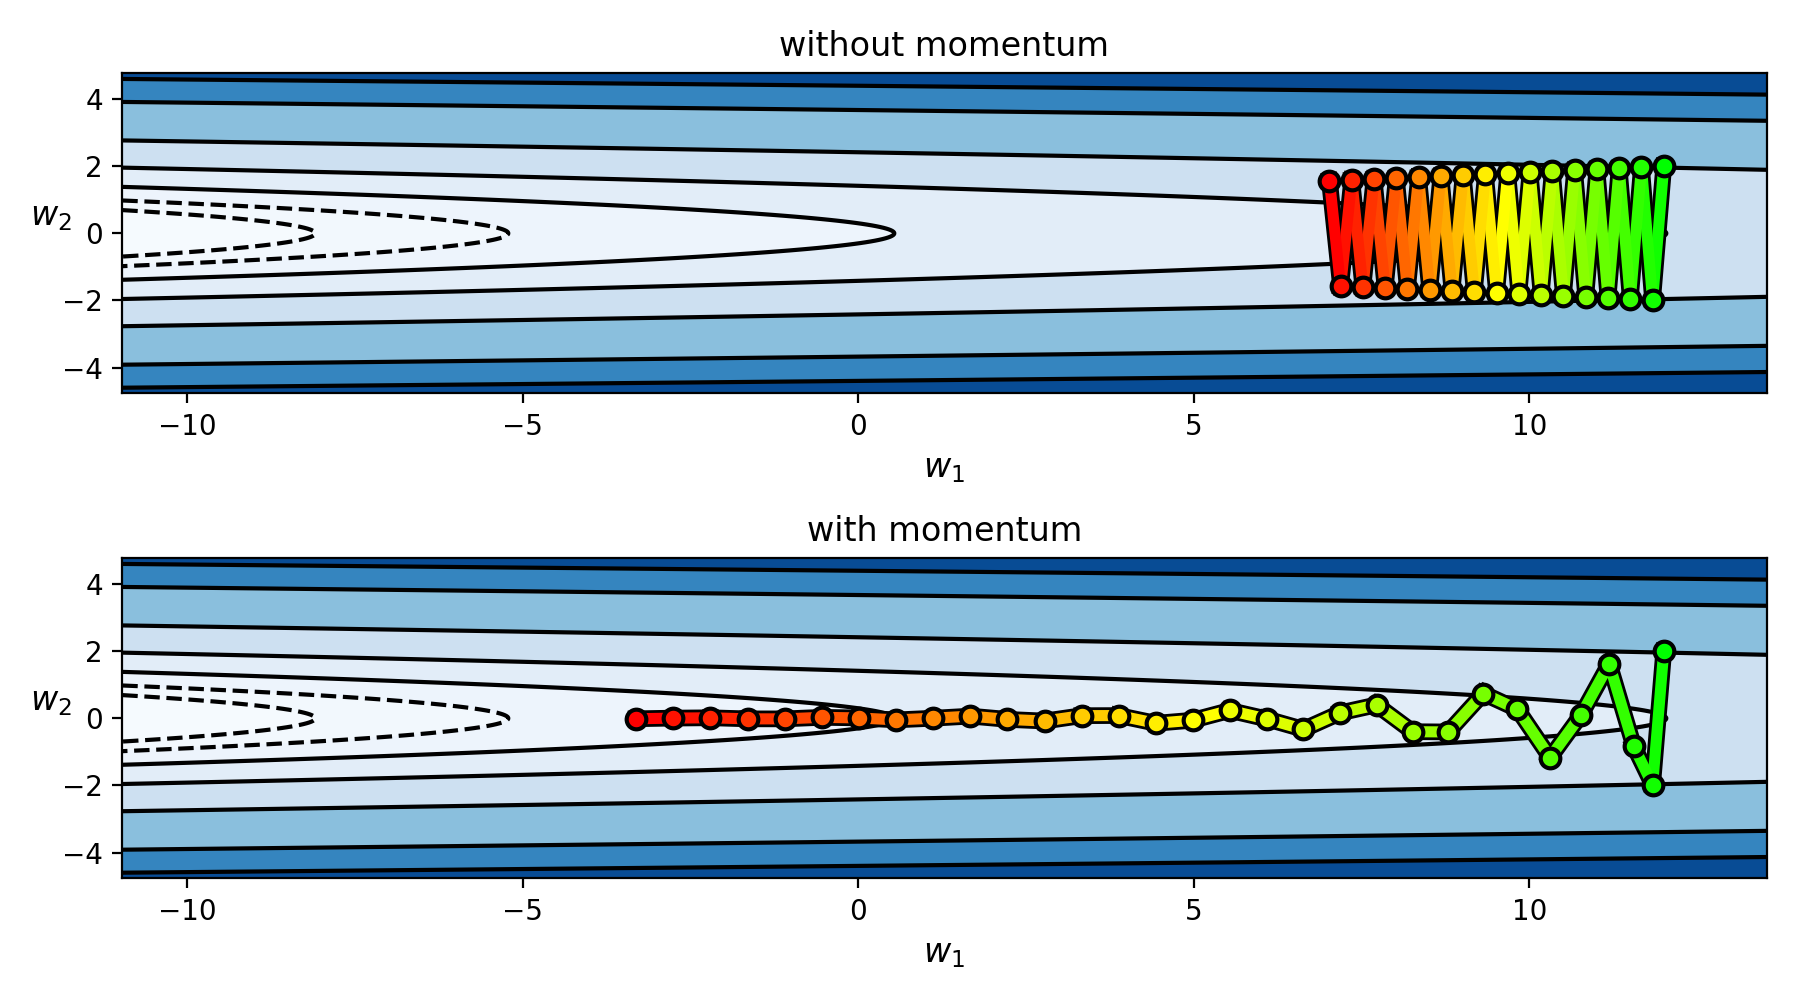

In [320]:
demo = contour_run_comparison.Visualizer()
demo.show_paths(g, weight_history_1,weight_history_2,num_contours = 20)

# Derivation of momentum

We want to reduce the affect of gradient descent zig-zagging down long narrow valleys of cost functions

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right)
\end{equation}

We do this to try take the difference between previous points - to even out the zig-zagging.  Taking the difference between the previous two points

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right) + \beta \left(\mathbf{w}^{k} - \mathbf{w}^{k-1}\right)
\end{equation}

Here $0 \leq \beta < 1$ is a parameter that trades off the direction from the negative gradient direction and the difference of the two previous points.  

We can also add in the difference between the two points peceeding - in an exponentially decreasing way - as 

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right) + \beta \left(\mathbf{w}^{k} - \mathbf{w}^{k-1}\right) + \beta^2 \left(\mathbf{w}^{k-1} - \mathbf{w}^{k-2}\right)
\end{equation}

and in general


\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right) + \beta \left(\mathbf{w}^{k} - \mathbf{w}^{k-1}\right) + \beta^2 \left(\mathbf{w}^{k-1} - \mathbf{w}^{k-2}\right) + \cdots + \beta^{k}\left(\mathbf{x}^{1} - \mathbf{x}^{0}\right)
\end{equation}

Using the definition of the gradient descent, each point difference $\mathbf{w}^{k-j} - \mathbf{w}^{k-j-1} = \mathbf{w}^{k-j-1} - \alpha \nabla g\left(\mathbf{w}^{k-j-1}\right) - \mathbf{w}^{k-j-1} = - \nabla g\left(\mathbf{w}^{k-j-1}\right)$, so plugging this into the above we have

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right) - \beta \alpha \nabla g\left(\mathbf{w}^{k-1}\right) - \beta^2 \alpha \nabla g\left(\mathbf{w}^{k-2}\right) - \cdots - \beta^{k}\alpha\nabla g\left(\mathbf{x}^{0}\right)
\end{equation}

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k - \alpha \nabla g\left(\mathbf{w}^k\right) -  \alpha \sum_{j=1}^{k}\beta^{\,j}\nabla g\left(\mathbf{w}^{k-j}\right)
\end{equation}

and summarizing

\begin{equation}
\mathbf{w}^{k+1} = \mathbf{w}^k -  \alpha \sum_{j=0}^{k}\beta^{\,j}\nabla g\left(\mathbf{w}^{k-j}\right)
\end{equation}

This backwards looking momentum adjusted gradient descent step is often written in two stages as 

\begin{array}
\
\mathbf{z}^{k+1} = \beta\,\mathbf{z}^{k} + \nabla g\left(\mathbf{w}^k\right) \\
\mathbf{w}^{k+1} = \mathbf{w}^{k} - \alpha \, \mathbf{z}^{k+1}
\end{array}

where $\mathbf{z}^{0}$ is initialized as zeros.

# 1.  The problem with long narrow valleys

- Both convex and non-convex cost functions in machine learning / deep learning have a common problem: long narrow valleys leading to optimal points

- Lets use logistic regression a simple example to test first

# Functionalities

In [247]:
# tanh non-convex logistic least squares cost function
def tanh_least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p,:]
        y_p = y[p]
        cost +=(np.tanh(w[0] + w[1]*x_p) - y_p)**2
    return cost

In [248]:
# the convex softmax cost function
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*(w[0] + w[1]*x_p)))
    return cost

In [249]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten function mom
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist=[]
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm

        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))     

    return w_hist

In [250]:
# the perceptron cost function written more compactly
def counting_cost(w):
    cost  = 0.25*sum((np.sign(w[0] + np.dot(x,w[1:])) - y)**2)
    return cost

In [251]:
# compare cost to counting
def compare_classification_histories(histories,cost_func):
    ##### setup figure to plot #####
    # initialize figure
    fig = plt.figure(figsize = (9,3))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2) 
    ax1 = plt.subplot(gs[0]); 
    ax2 = plt.subplot(gs[1]);
        
    #### compute each cost ###
    cost_vals = []         # cost evaluations
    count_vals = []        # counting evaluations
    
    # run through weights, evaluate classification and counting costs, record
    c = 1
    for history in histories:
        cost_vals = []
        count_vals = []
        for weight in history:
            ### record softmax cost evaluation
            cost = cost_func(weight)
            cost_vals.append(cost)

            # record count evaluation
            count = counting_cost(weight)
            count_vals.append(count)
        
        # plot both classification and counting cost histories
        ax1.plot(count_vals,label = 'run ' + str(c),linewidth = 4*(0.8)**(c))
        ax2.plot(cost_vals, label = 'run ' + str(c), linewidth =  4*(0.8)**(c))
        c += 1
        
    ax1.set_title('number of misclassificaions')
    ax2.set_title('cost function value')
    plt.legend(loc='upper right')
    plt.show()

# Example - tanh least squares classification

In [252]:
# load in dataset
data = np.loadtxt('datasets/2d_classification_data_v1.csv')

# define the input and output of our dataset
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [253]:
w_init = np.zeros((2,1))
w_init[0] = 0
w_init[1] = 0
# w_init = np.random.randn(2,1)
alpha = 1
max_its = 25
version = 'normalized'

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(tanh_least_squares,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.8
beta = 0.8
weight_history_2 = gradient_descent(tanh_least_squares,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.9
weight_history_3 = gradient_descent(tanh_least_squares,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.99
weight_history_4 = gradient_descent(tanh_least_squares,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


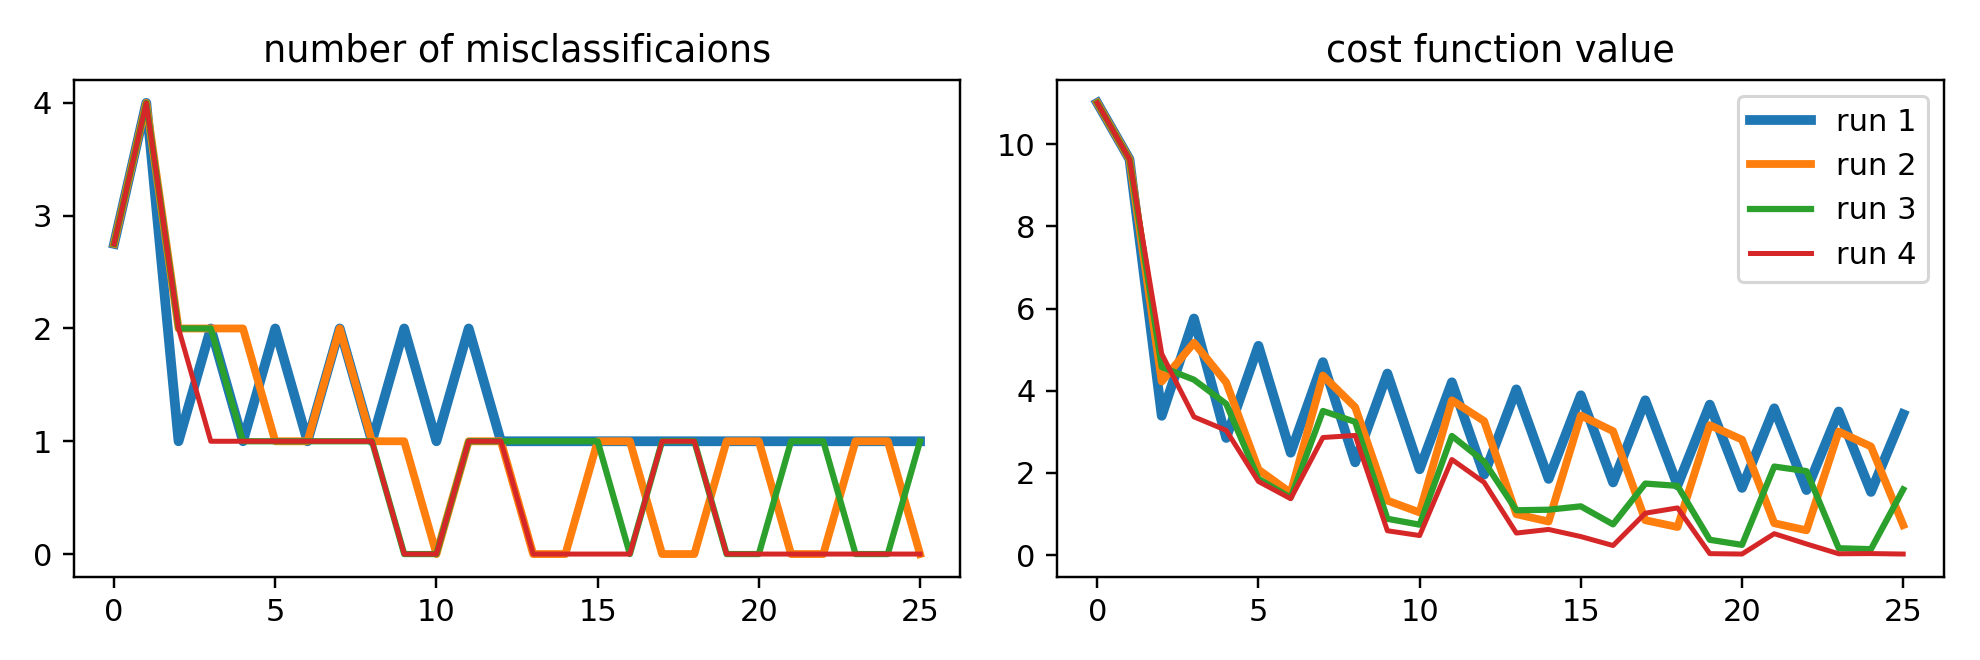

In [254]:
histories = [weight_history_1,weight_history_2,weight_history_3,weight_history_4]
compare_classification_histories(histories,tanh_least_squares)


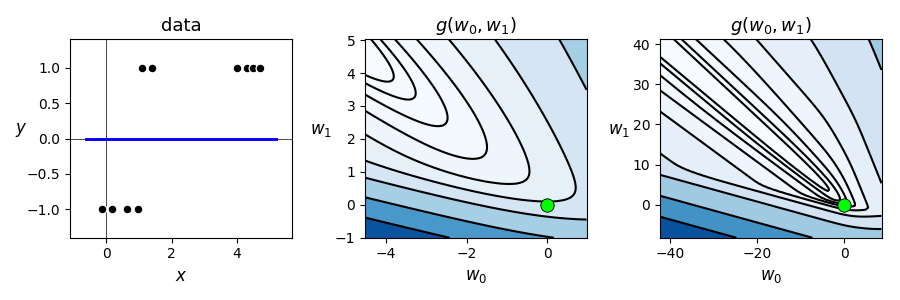
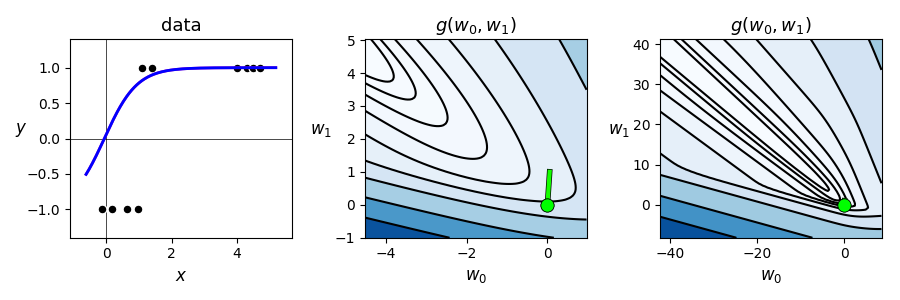
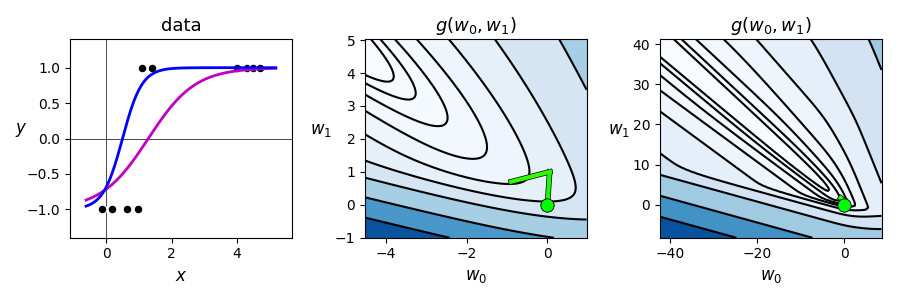
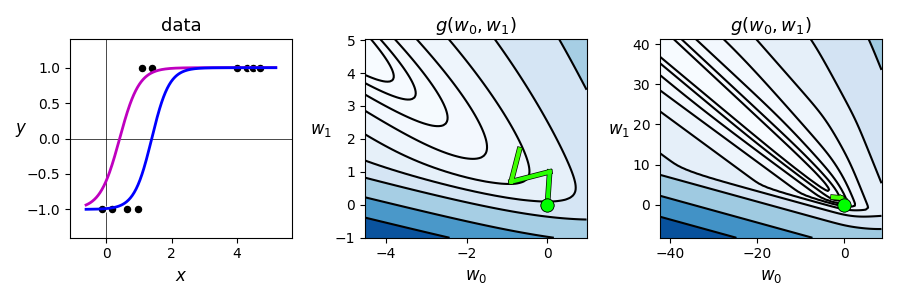
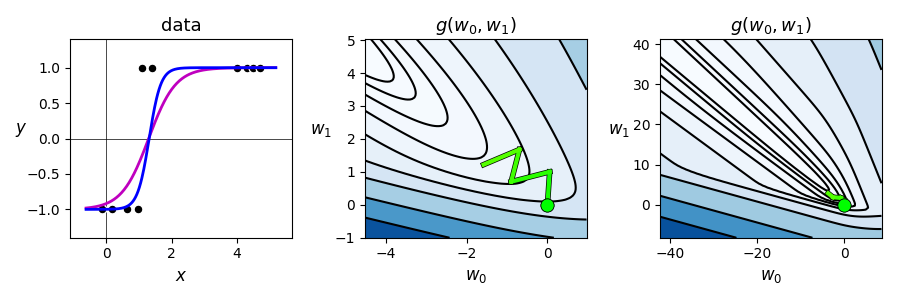
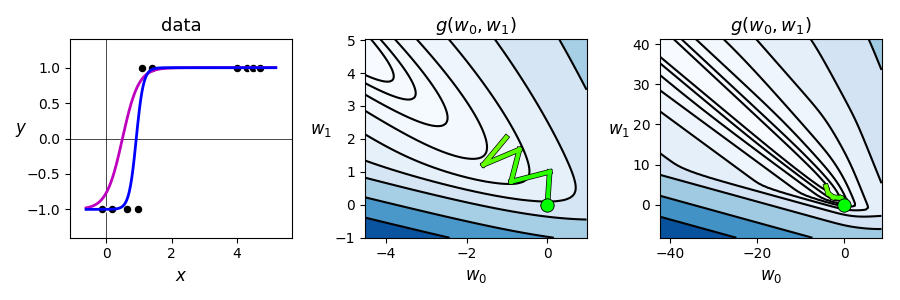
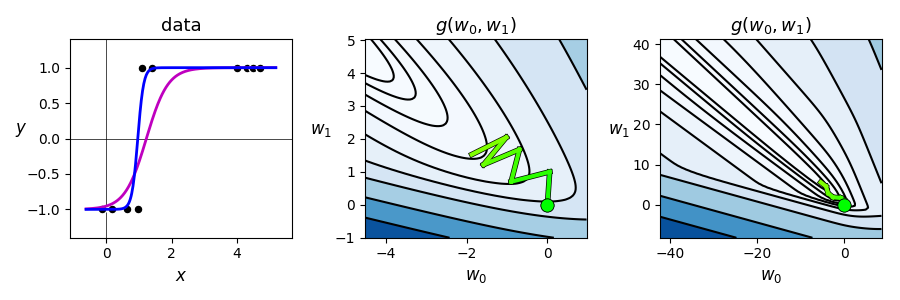
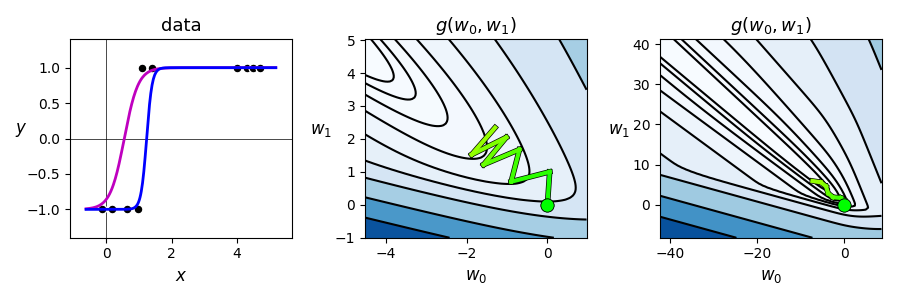
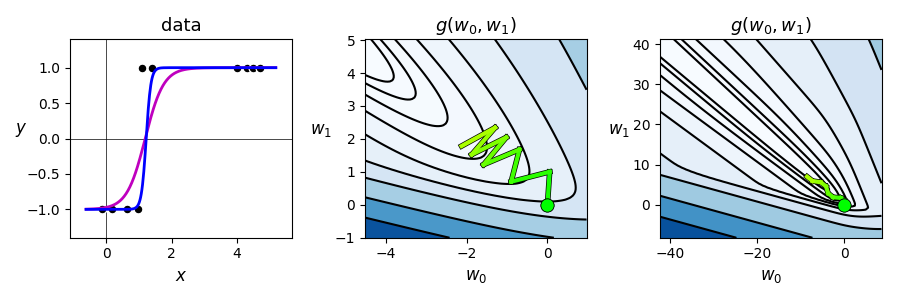
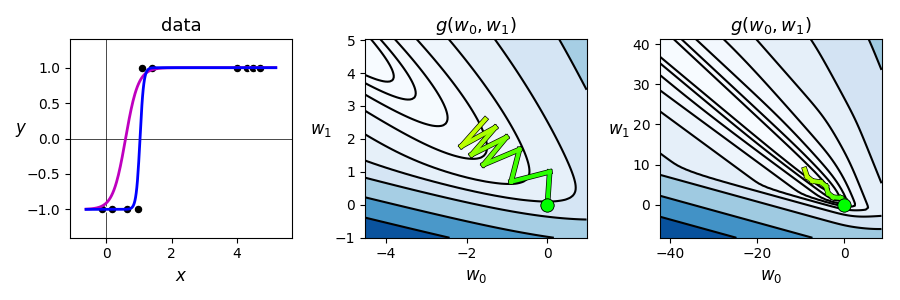
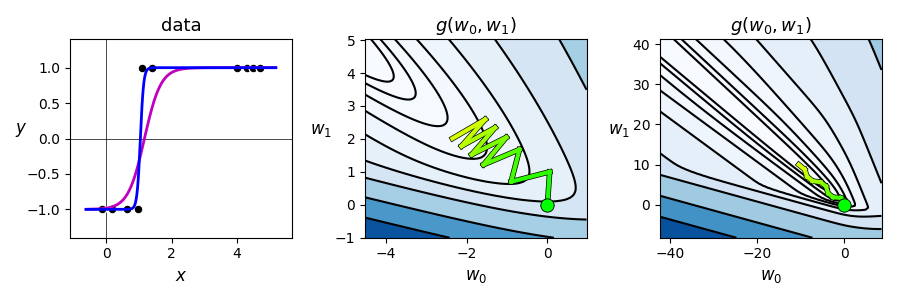
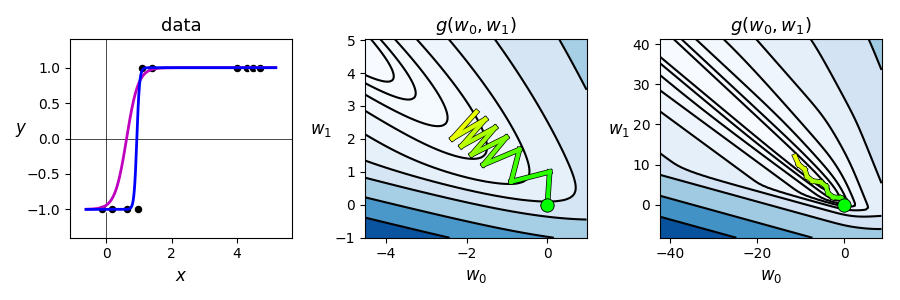
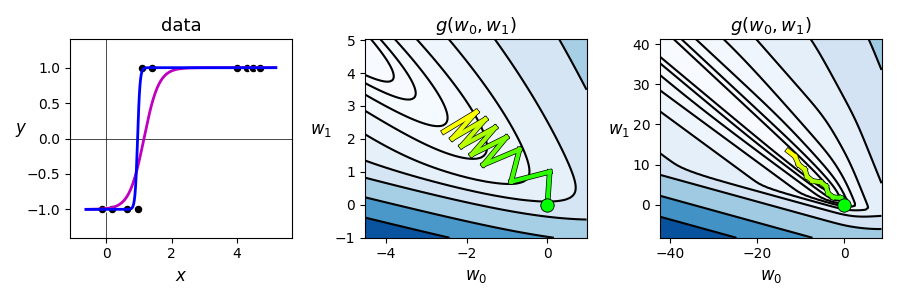
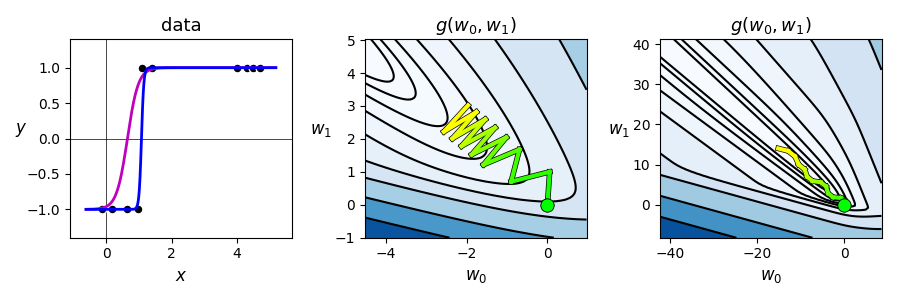
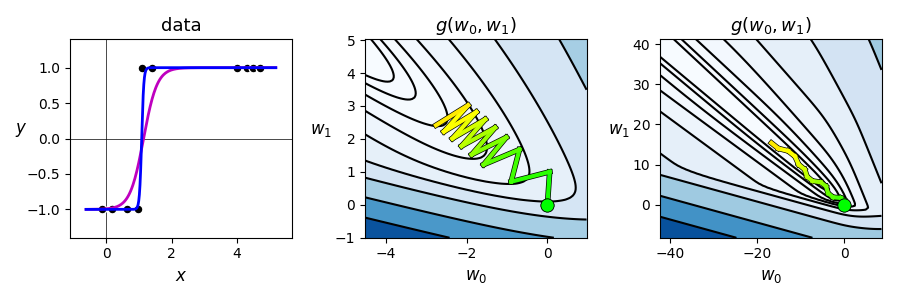
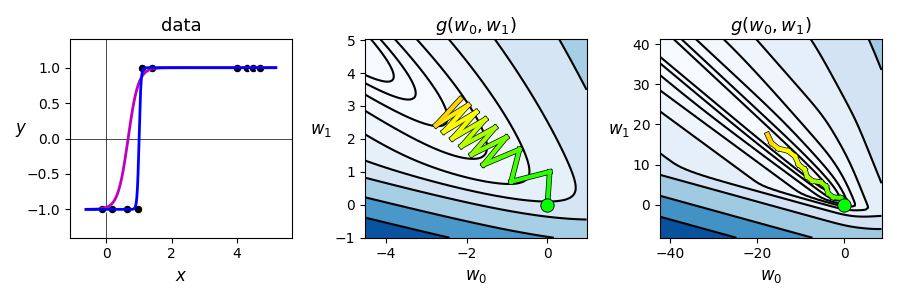
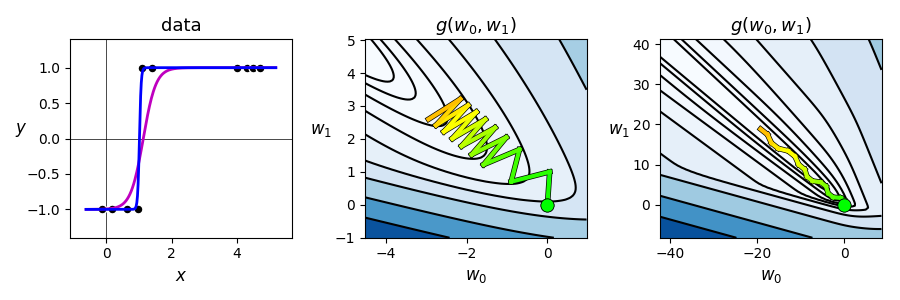
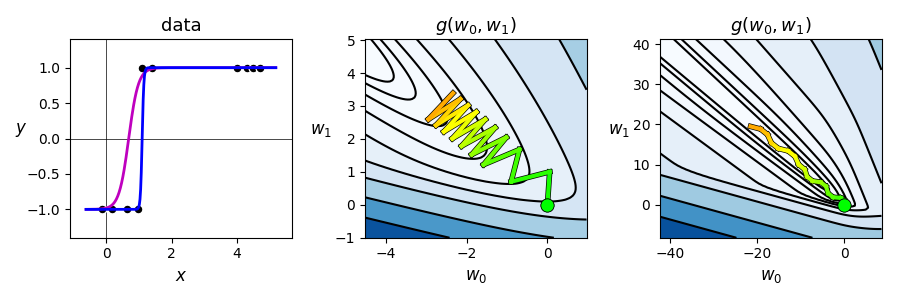
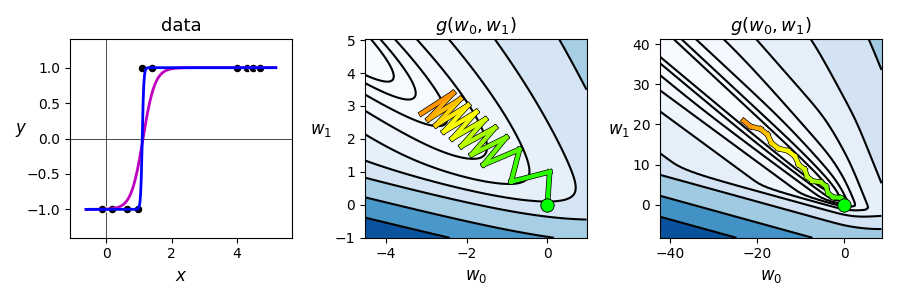
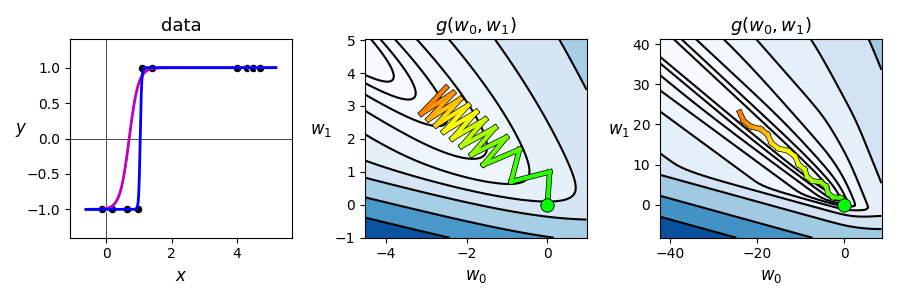
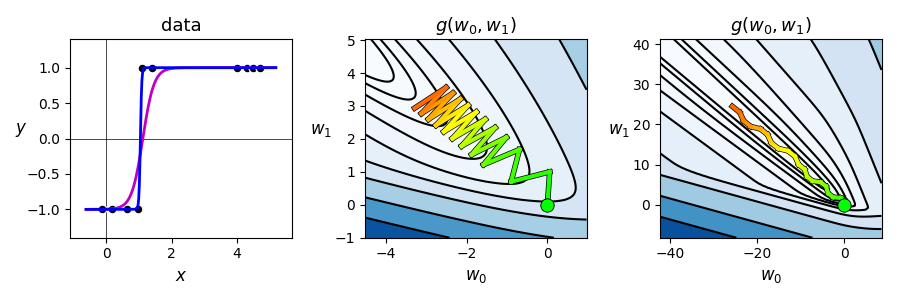
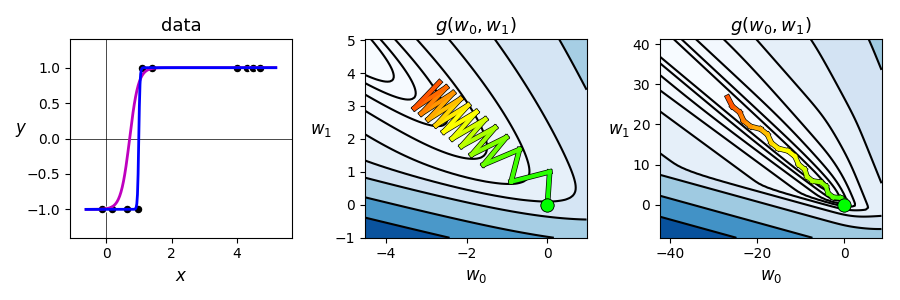
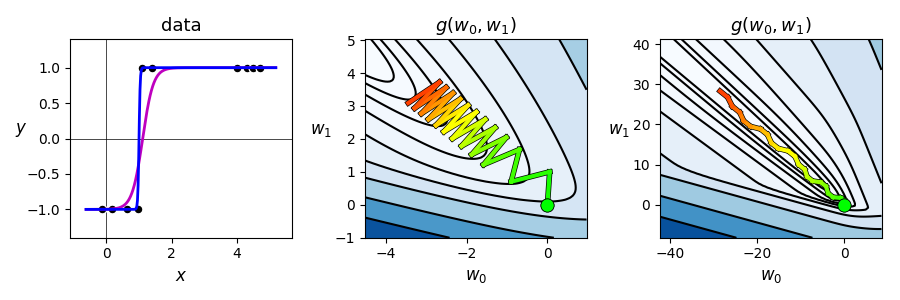
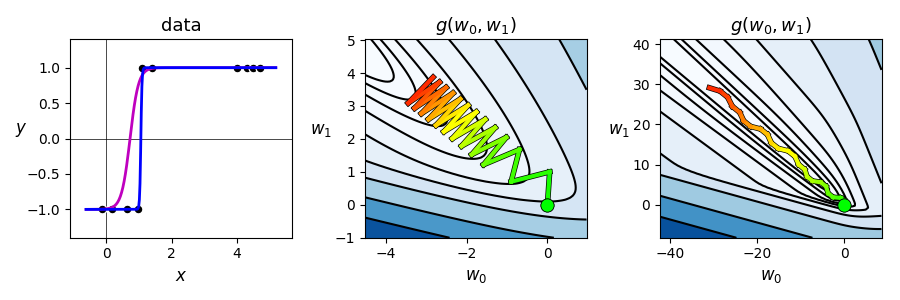
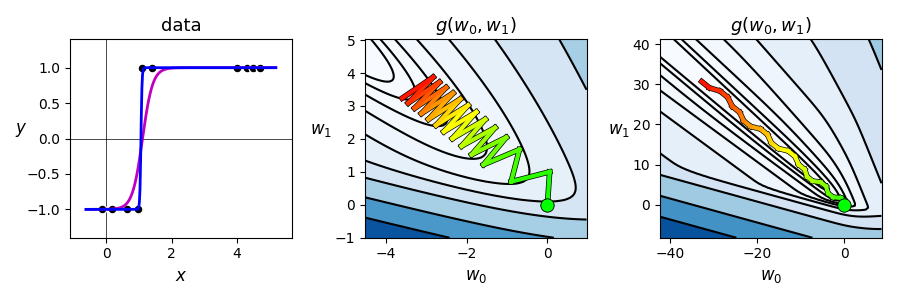
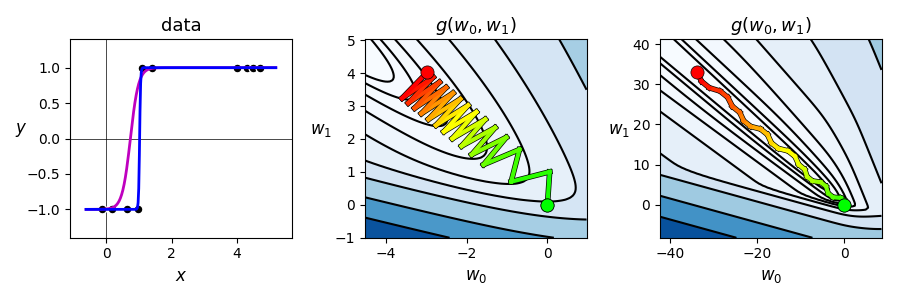

In [112]:
# create instance of logisic regression demo and load in data, cost function, and descent history
demo3 = superlearn.classification_2d_demos_v2.Visualizer(data,softmax)

# animate descent process
demo3.animate_runs(weight_history_1,weight_history_4,num_contours = 25)

# Example - softmax cost

In [255]:
# load in dataset
data = np.loadtxt('datasets/2d_classification_data_v1.csv')

# define the input and output of our dataset
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [270]:
w_init = np.zeros((2,1))
w_init[0] = 3
w_init[1] = 3
# w_init = np.random.randn(2,1)
alpha = 10**(-1)
alpha = 1
max_its = 25
version = 'unnormalized'

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(softmax,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.8
beta = 0.3
weight_history_2 = gradient_descent(softmax,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.5
weight_history_3 = gradient_descent(softmax,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.8
weight_history_4 = gradient_descent(softmax,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


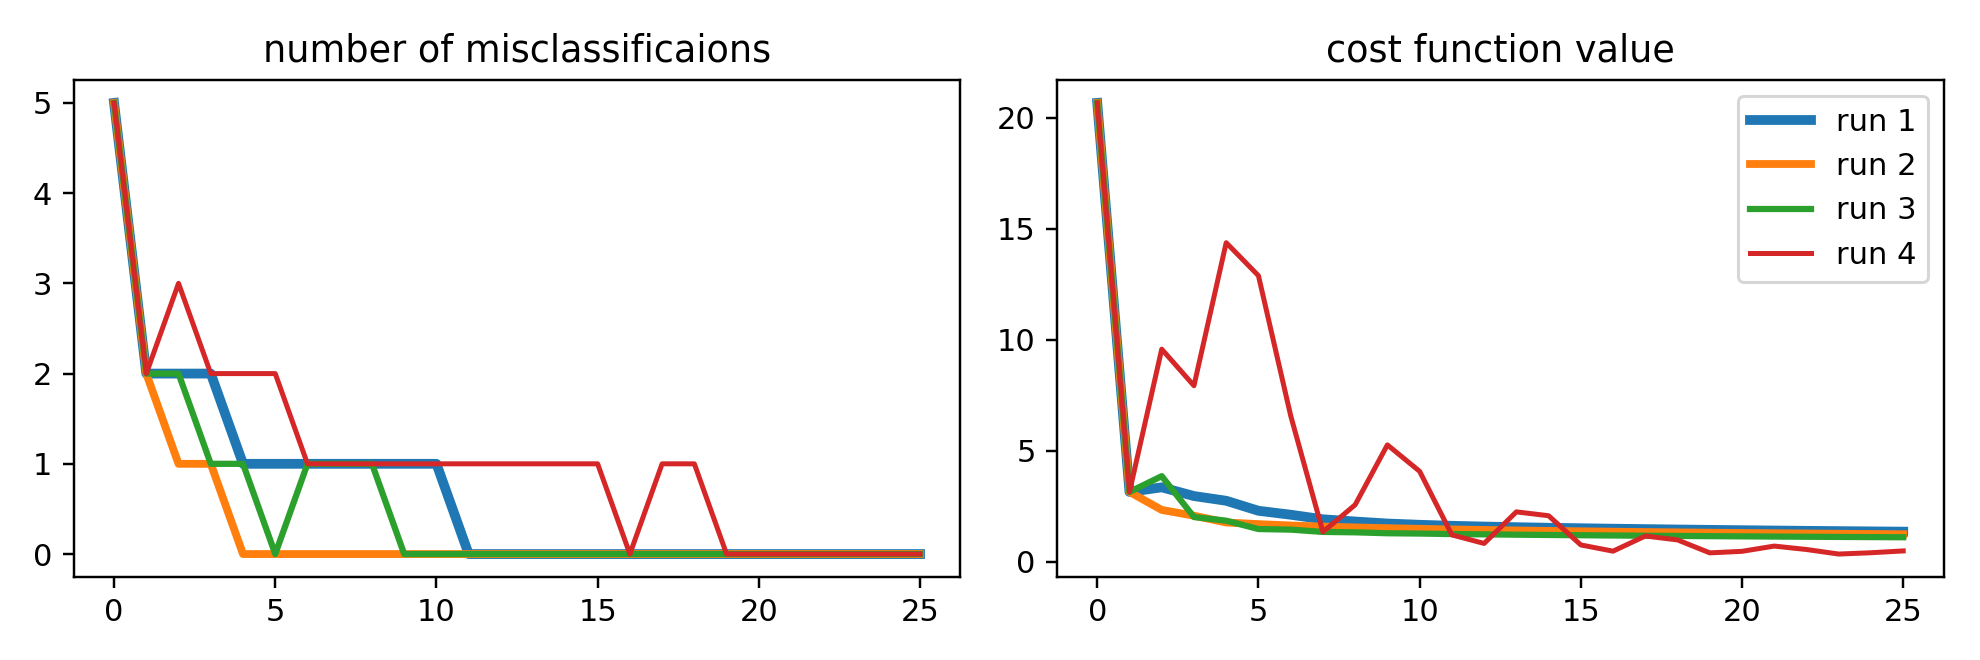

In [271]:
histories = [weight_history_1,weight_history_2,weight_history_3,weight_history_4]
compare_classification_histories(histories,softmax)


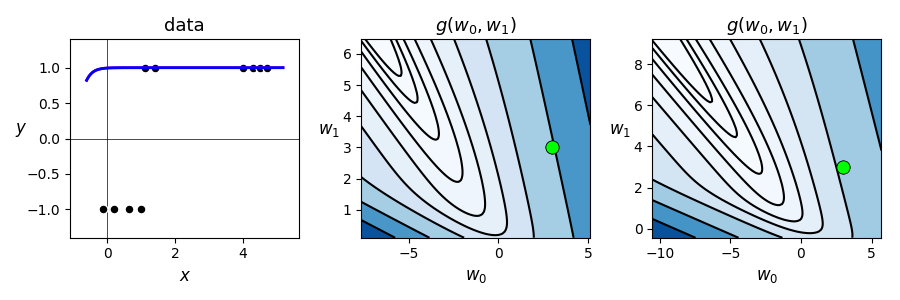
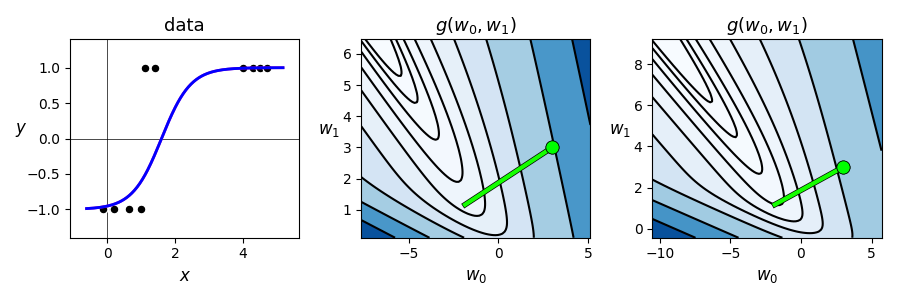
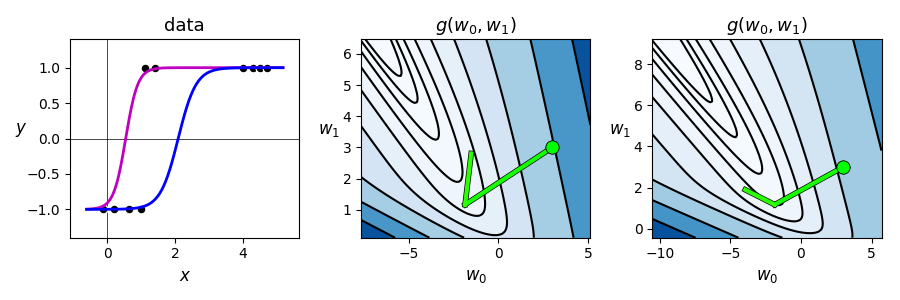
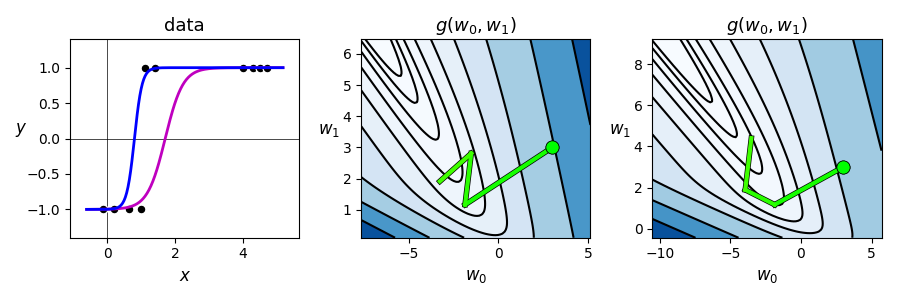
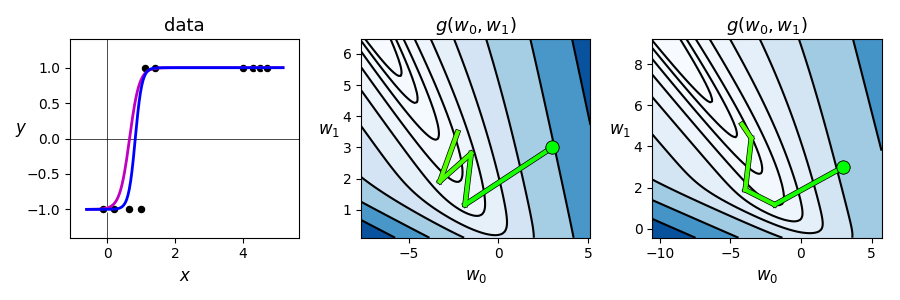
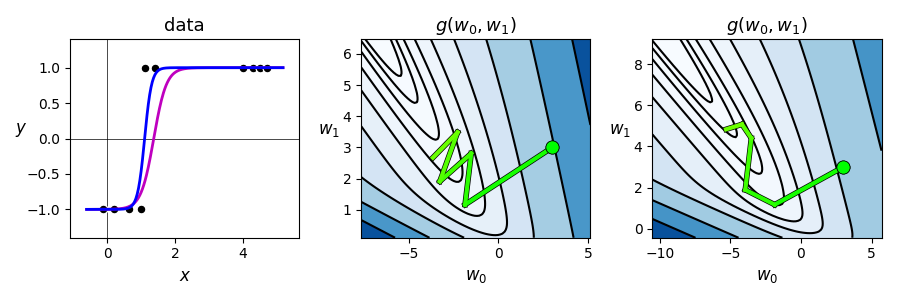
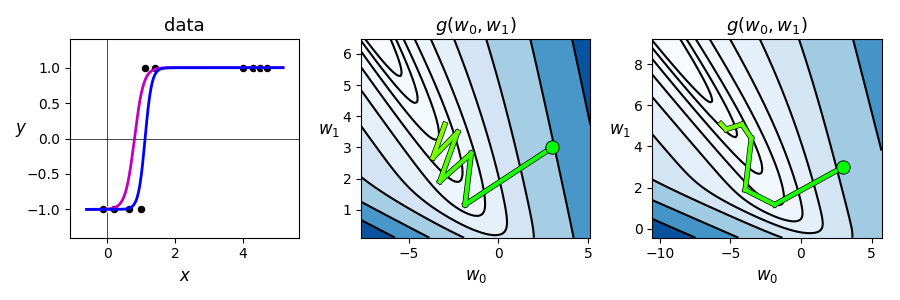
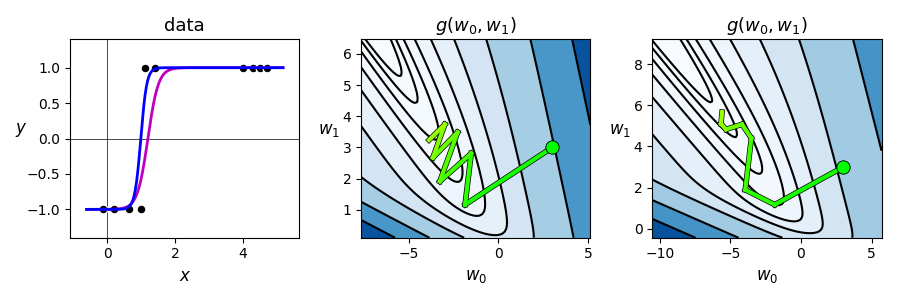
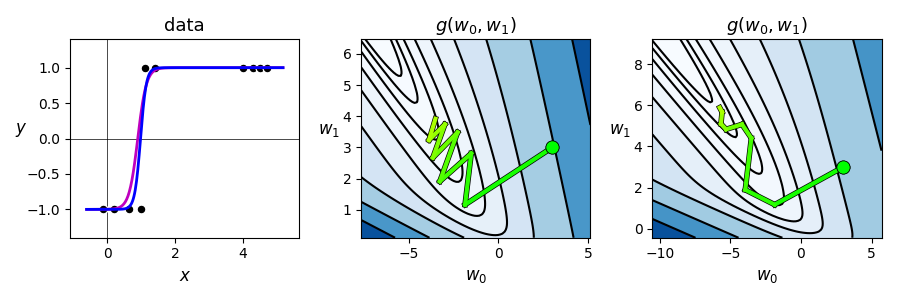
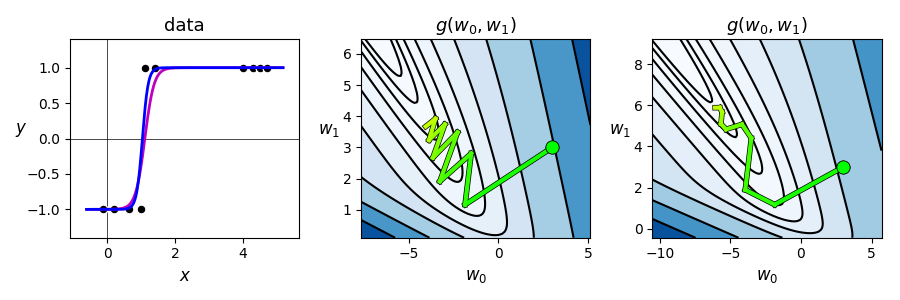
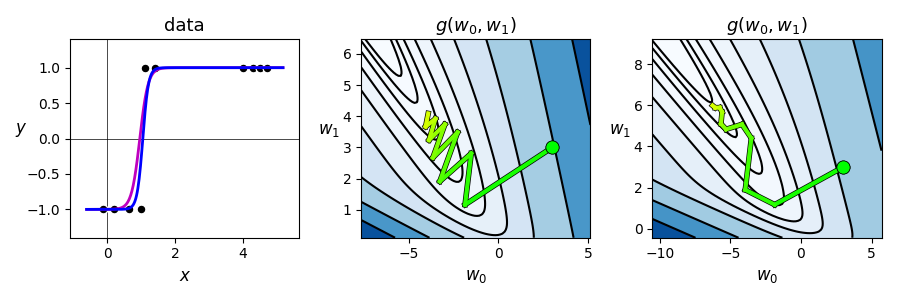
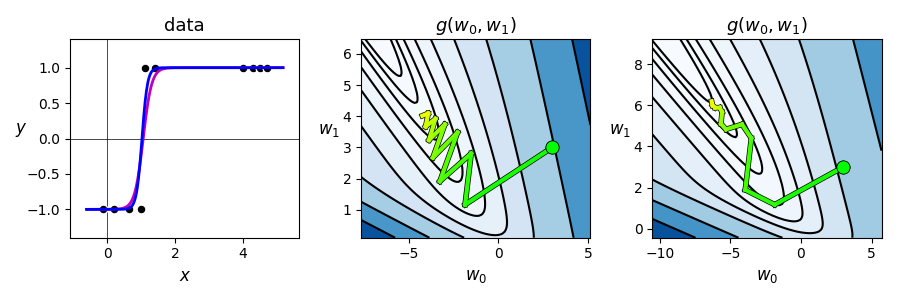
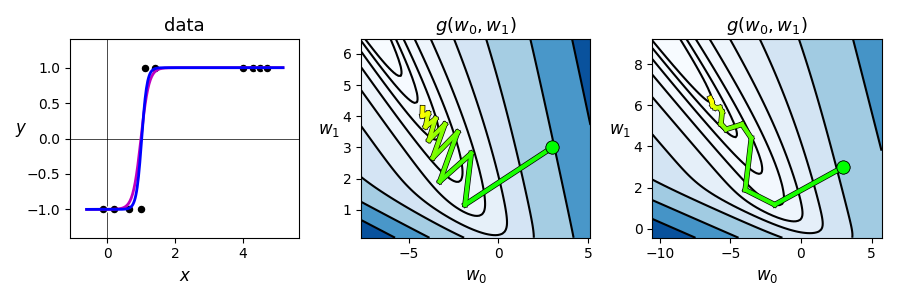
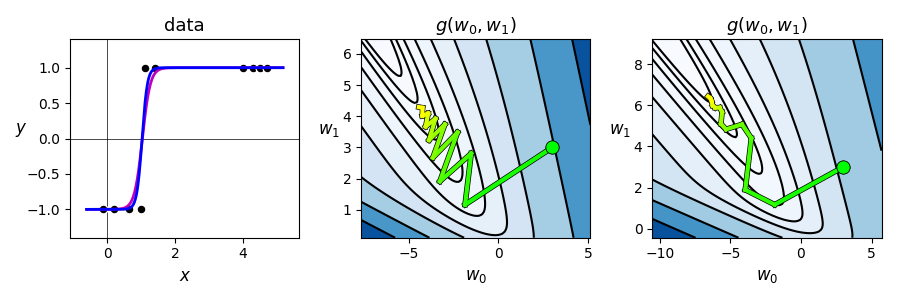
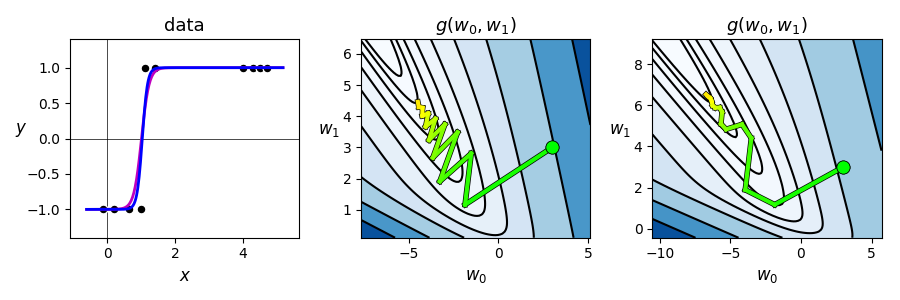
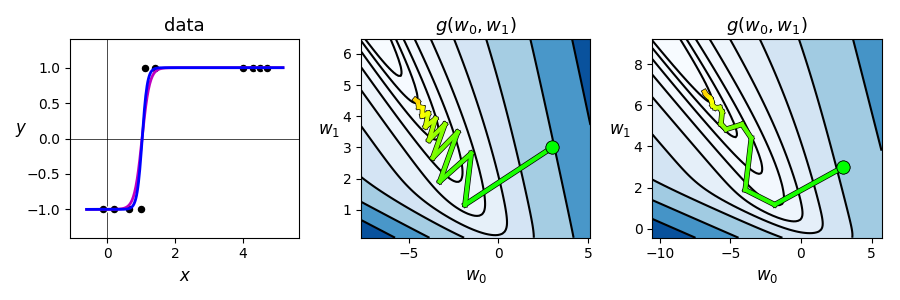
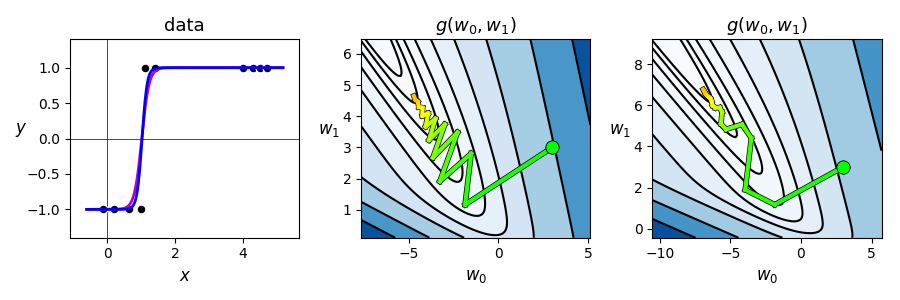
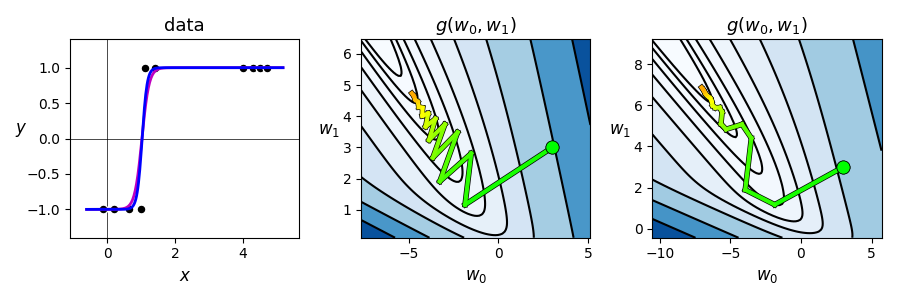
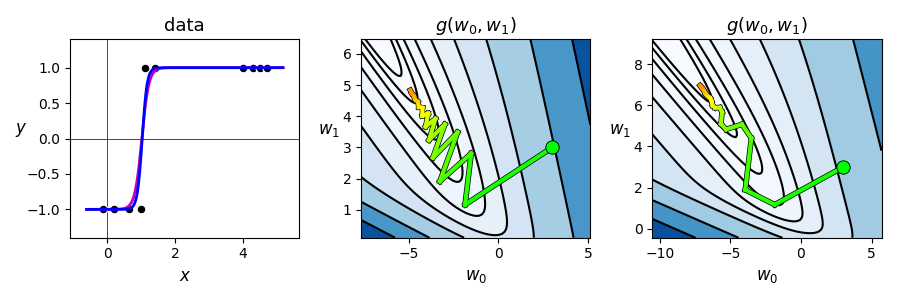
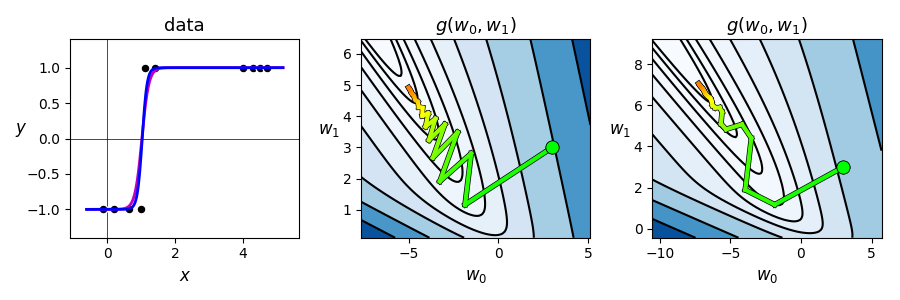
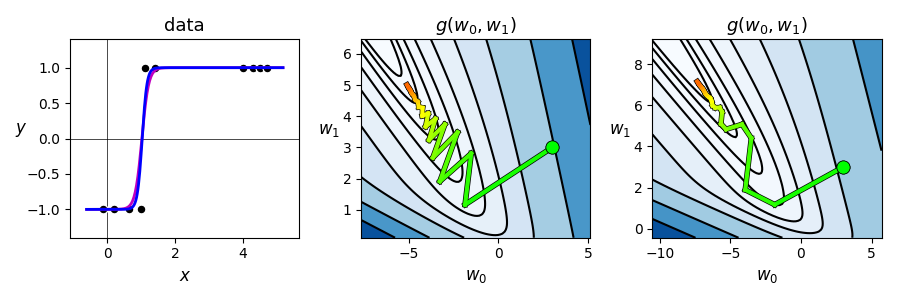
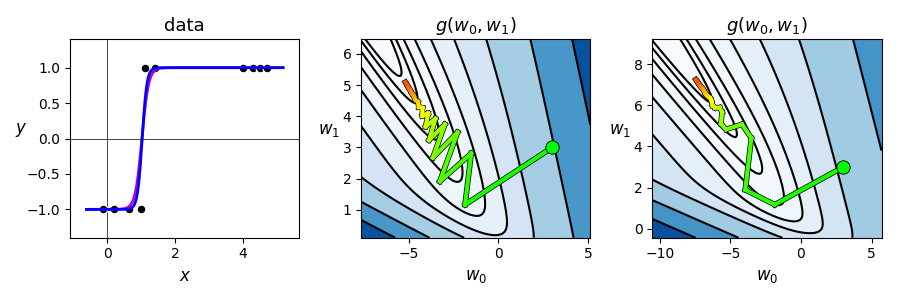
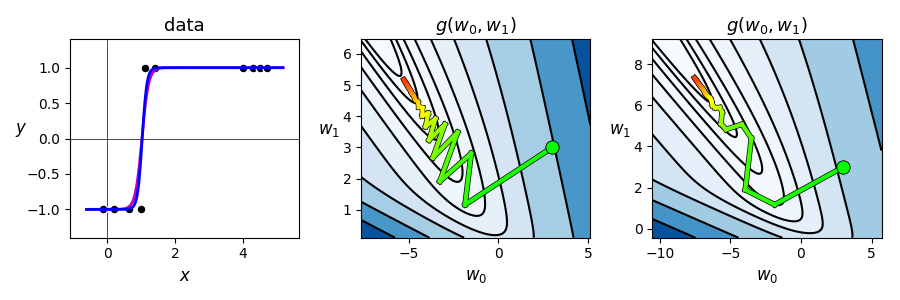
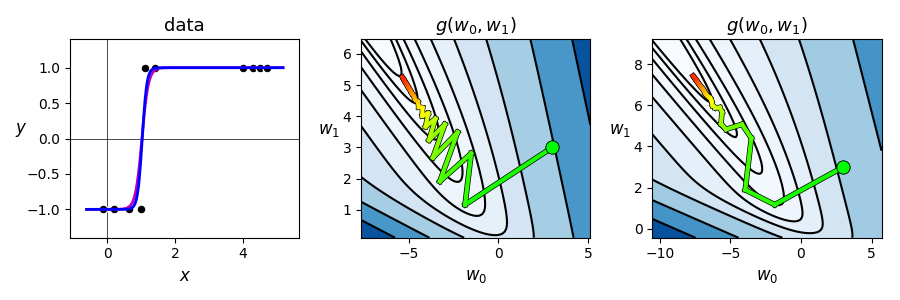
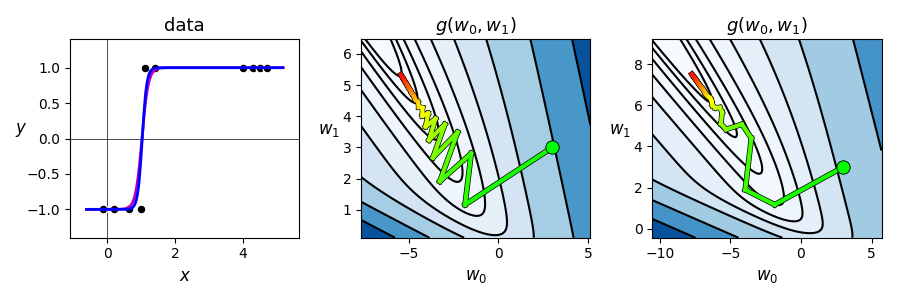
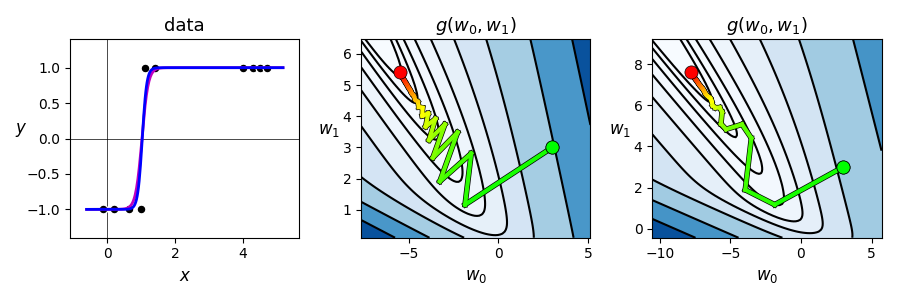

In [272]:
# create instance of logisic regression demo and load in data, cost function, and descent history
demo3 = superlearn.classification_2d_demos_v2.Visualizer(data,softmax)

# animate descent process
demo3.animate_runs(weight_history_1,weight_history_3,num_contours = 25)

# Convex polynomial sin fitting

In [11]:
# compare cost to counting
def compare_regression_histories(histories,cost_func):
    ##### setup figure to plot #####
    # initialize figure
    fig = plt.figure(figsize = (9,3))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 1) 
    ax1 = plt.subplot(gs[0]); 
        
    #### compute each cost ###
    cost_vals = []         # cost evaluations
    
    # run through weights, evaluate classification and counting costs, record
    c = 1
    for history in histories:
        cost_vals = []
        for weight in history:
            ### record softmax cost evaluation
            cost = cost_func(weight)
            cost_vals.append(cost)
        
        # plot both classification and counting cost histories
        ax1.plot(cost_vals,label = 'run ' + str(c),linewidth = 4*(0.8)**(c))
        c += 1
        
    ax1.set_title('MSE')
    plt.legend(loc='upper right')
    plt.show()

In [3]:
data = np.loadtxt('../datasets/noisy_sin_sample.csv',delimiter=',')

# define the input and output of our dataset
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [4]:
# polynomial degree parameter
D = 5

# prediction function
def predict(pt,w):
    # linear combo
    a = w[0] + sum([w[i]*pt**i for i in range(1,D+1)])
    return a

In [5]:
# least squares
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost +=(predict(x_p,w) - y_p)**2
    return cost/float(len(y))

In [29]:
w_init = np.zeros((D+1,1))

# w_init = np.random.randn(2,1)
alpha = 2*10**(-1)
max_its = 100

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version = 'unnormalized')

# use momentum with beta = 0
beta = 0.8
weight_history_2 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version = 'unnormalized')


# use momentum with beta = 0.8
beta = 0
weight_history_3 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version = 'normalized')

# use momentum with beta = 0.9
beta = 0.5
weight_history_4 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version = 'normalized')

# # use momentum with beta = 0.8
# beta = 0.95
# weight_history_4 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


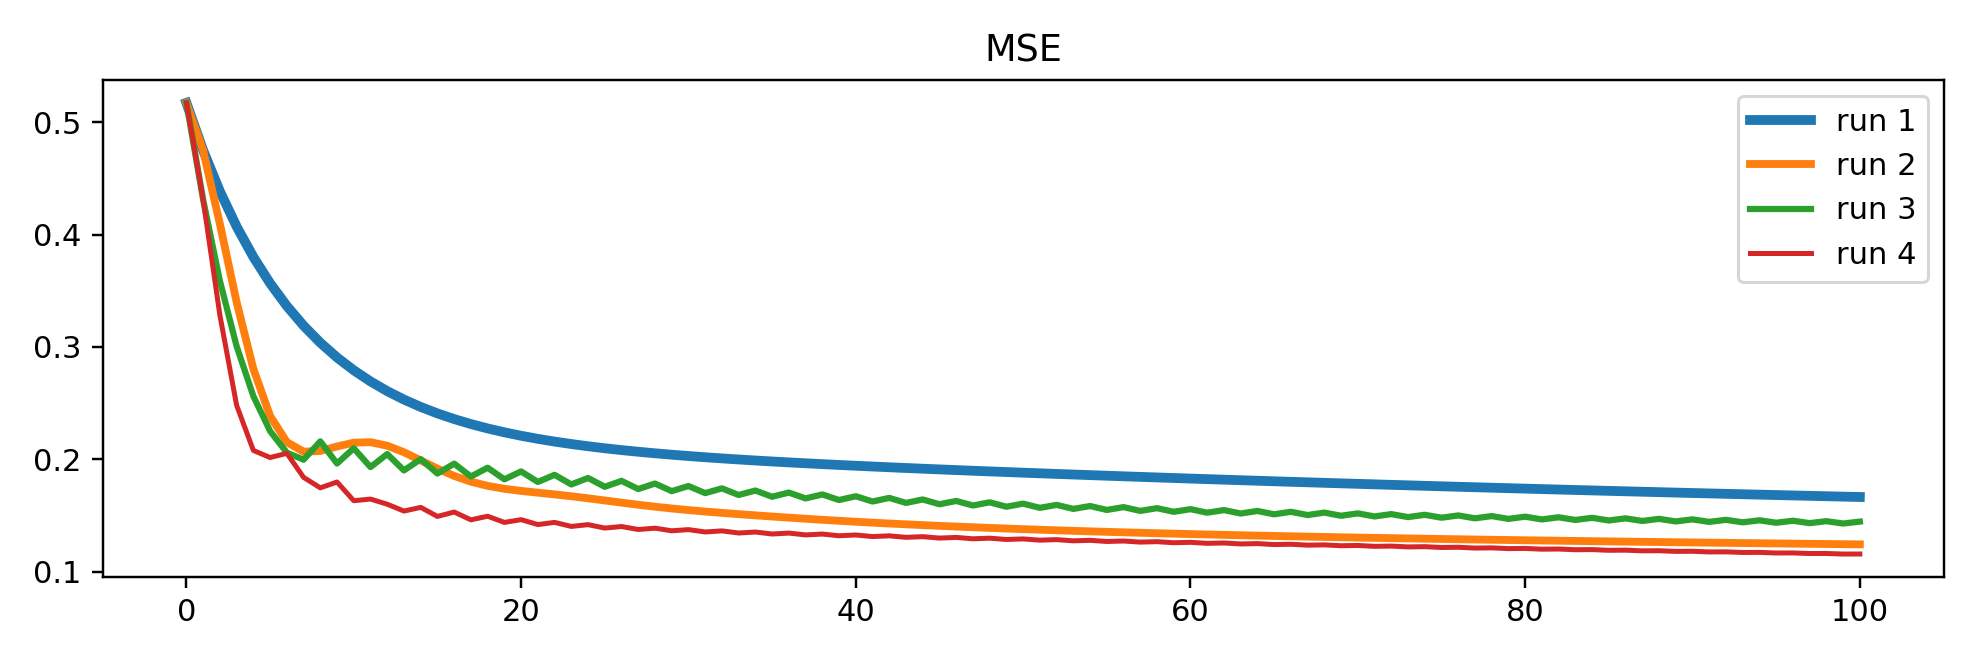

In [30]:
histories = [weight_history_1,weight_history_2,weight_history_3,weight_history_4]
compare_regression_histories(histories,least_squares)

<IPython.core.display.Javascript object>


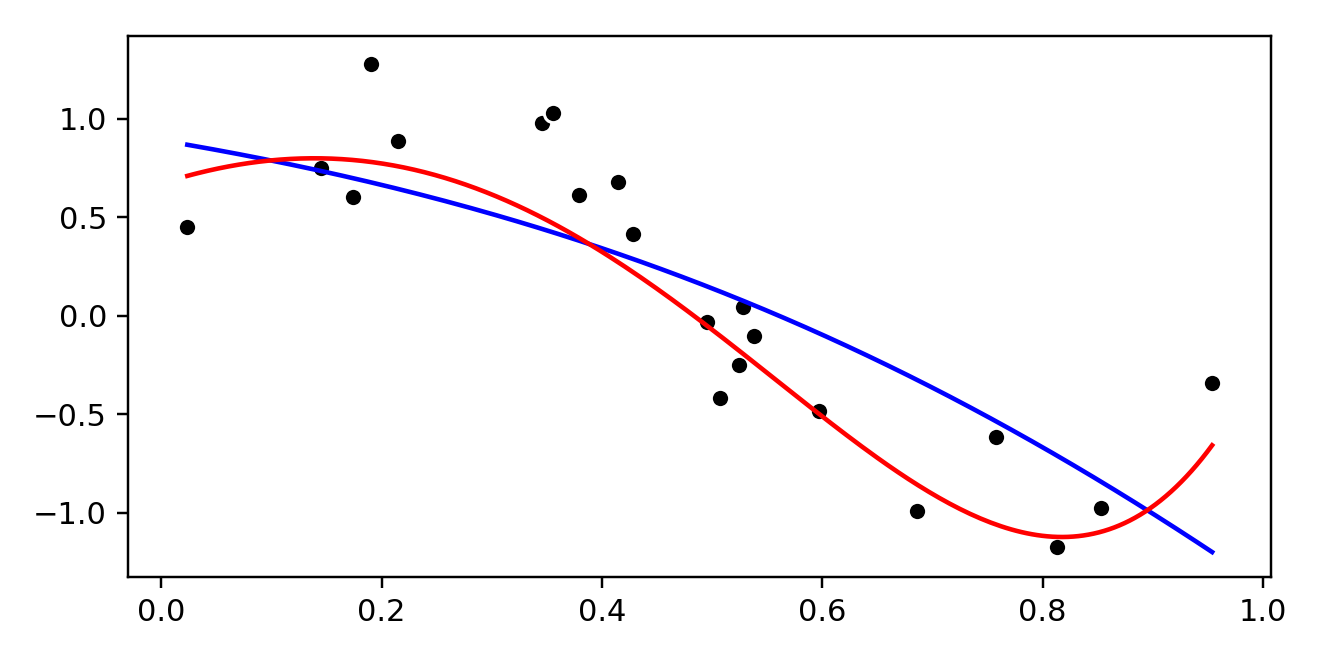

In [28]:
# create figure and plot data
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.scatter(x,y,color = 'k',edgecolor = 'w')

# fit regression model to data
w1 = weight_history_1[-1]
w2 = weight_history_4[-1]

# make fits
x_vals = np.linspace(min(x),max(x),200)
y_vals_1 = [predict(v,w1) for v in x_vals]
y_vals_2 = [predict(v,w2) for v in x_vals]

# plot it
ax.plot(x_vals,y_vals_1,color = 'blue')
ax.plot(x_vals,y_vals_2,color = 'red')

plt.show()

# SINGLE LAYER NETWORK - USING MOMENTUM

In [234]:
# load in dataset  http://math.arizona.edu/~dsl/
datapath = 'datasets/noisy_sin_sample.csv'
data = np.asarray(pd.read_csv(datapath,header = None))
demo1 = nonlib.basis_regression_visualizer.Visualizer(data)

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
x = demo1.x    # define input of dataset prior to function definition
y = demo1.y    # define output of dataset prior to function definition
    
# prediction
# network predictor
def predict(inputs,weights):
    for w_0,w in weights:
        outputs = w_0 + np.dot(w,inputs)
        inputs = np.maximum(0,outputs)  
    return outputs[0][0]

# least squares
def least_squares(weights):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost +=(predict(x_p,weights) - y_p)**2
    return cost/float(len(y))

## weight initializer ##
D = 5
scale = 1
layer_sizes = [1,D,1]
w_init = [ ((np.random.randn(outsize,1))*scale,        # bias vector
        (np.random.randn(outsize,insize))*scale)   # weight matrix
        for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [241]:
# w_init = np.random.randn(2,1)
alpha = 10**(-2)
max_its = 50
version = 'normalized'

# use momentum with beta = 0
beta = 0
weight_history_1 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.8
beta = 0.8
weight_history_2 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version)

# use momentum with beta = 0.9
beta = 0.9
weight_history_3 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version)

# # use momentum with beta = 0.9
# beta = 0.95
# weight_history_4 = gradient_descent(least_squares,w_init,alpha,max_its,beta,version)

<IPython.core.display.Javascript object>


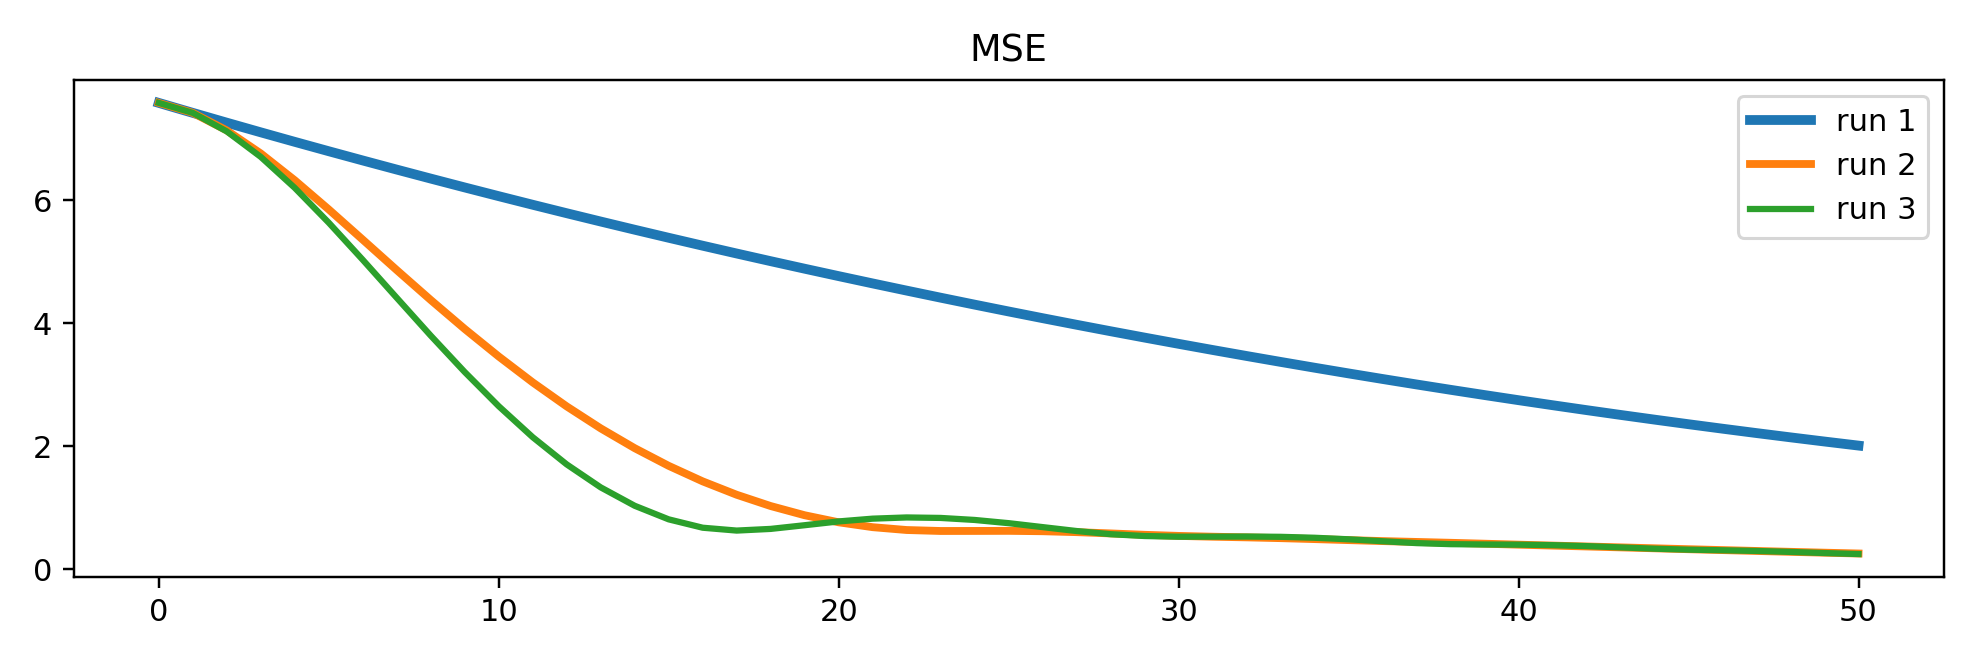

In [242]:
histories = [weight_history_1,weight_history_2,weight_history_3]
compare_regression_histories(histories,least_squares)

<IPython.core.display.Javascript object>


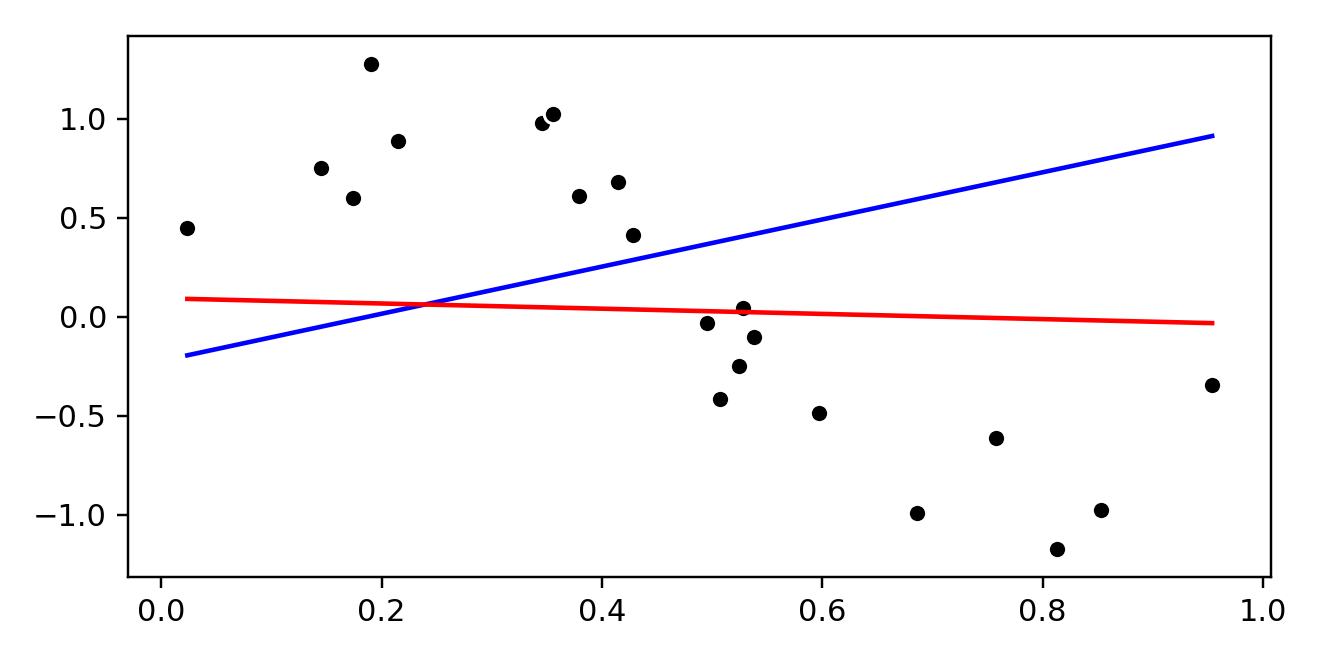

In [240]:
# create figure and plot data
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.scatter(x,y,color = 'k',edgecolor = 'w')

# fit regression model to data
w1 = weight_history_1[-1]
w2 = weight_history_3[-1]

# make fits
x_vals = np.linspace(min(x),max(x),200)
y_vals_1 = [predict(v,w1) for v in x_vals]
y_vals_2 = [predict(v,w2) for v in x_vals]

# plot it
ax.plot(x_vals,y_vals_1,color = 'blue')
ax.plot(x_vals,y_vals_2,color = 'red')

plt.show()